In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Answer:
# There is missing data in the columns: age, cabin, embarked

# embarked - there are only two missing values, so it has no effect on the results of the analysis.

# cabin - This is the cabin in which the passenger was staying, a figure that can greatly 
# affect his chances of survival. Since about 80% of the data is missing, we can not use this column, so it can be omitted

# age - We will complete the figures by using the median age of each gender. 
# That is - for female passengers without an age listed, we will fill in the median value of all women, and the age of male passengers without an age listed, we will fill in the median value of all men


## Drop Cabin column from the DF

In [5]:
df.drop('Cabin', axis='columns', inplace=True)

## Fill the median value of column Age for each gender (male, female)

#### Fill female data

In [6]:
# filter female only
mask_female = df['Sex'] == 'female'

# How many female values are null?
df[mask_female].isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            53
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
dtype: int64

In [7]:


# calculate the median of female
f_median = df.loc[mask_female,'Age'].median()
f_median

27.0

In [8]:
# fill female missing values
df.loc[mask_female,'Age'] = df.loc[mask_female,'Age'].fillna(f_median)

In [9]:
# check if completed succesfully
df[mask_female].isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### Fill male data

In [10]:
# filter male only
mask_male = df['Sex'] == 'male'

# How many male values are null?
df[mask_male].isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [11]:
# Now we see how we can update withoun using variables:

df.loc[mask_male,'Age'] = df.loc[mask_male,'Age'].fillna(df.loc[mask_male,'Age'].median())

In [12]:
# check if completed succesfully
df[mask_male].isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Fill missing values in 'embarked' column with common value

In [13]:
common_embarked = df['Embarked'].value_counts().head(1).index[0]

In [14]:
df['Embarked'].fillna(common_embarked, inplace=True)

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Passengers distribution by gender

Text(0.5, 1.0, '\nPassengers distribution by gender')

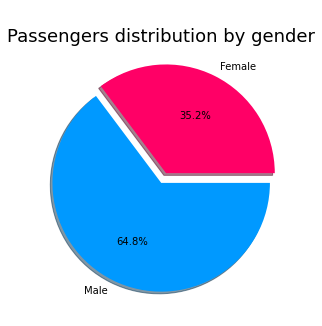

In [16]:
df.groupby('Sex')['PassengerId'].count().plot.pie(colors=('#FF0066','#0099FF'), 
                                                  labels=('Female', 'Male'),
                                                  autopct='%1.1f%%',
                                                  shadow=True, 
                                                  explode=(0.1, 0),                                         
                                                  figsize=(5,5),
                                                  ylabel=''
                                                 )

plt.title('\nPassengers distribution by gender',
          fontsize='18'
         )

## Passengers distribution by gender and survived

In [17]:
pt_sex_srv = df.pivot_table(columns='Sex', index='Survived', values='PassengerId', aggfunc='count')

pt_sex_srv

Sex,female,male
Survived,,
0,81,468
1,233,109


([<matplotlib.axis.XTick at 0x22d25183c70>,
 [Text(0, 0, "Didn't survives"), Text(1, 0, 'Survived')])

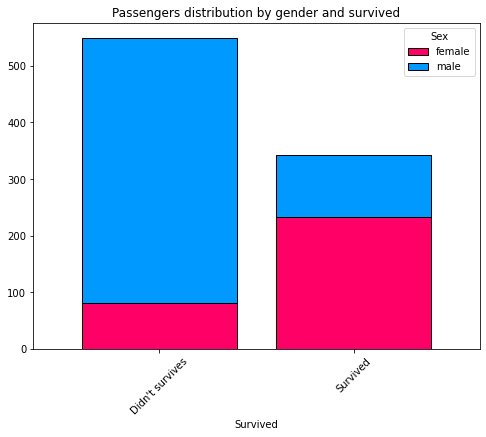

In [18]:
pt_sex_srv.plot.bar(width=0.8,
              color=('#FF0066','#0099FF'), 
              edgecolor='black', 
              figsize=(8,6),
              title='Passengers distribution by gender and survived',
              stacked=True
             )

plt.xticks([0,1], labels=["Didn't survives", 'Survived'], rotation=45)

## Fare ticket by gender

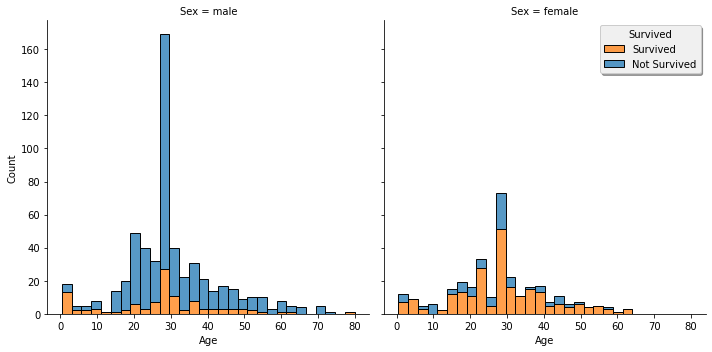

In [26]:
sns.displot(df, x='Age', 
            hue='Survived', 
            col='Sex', 
            multiple='stack', 
            legend=False)

plt.legend(loc='best', 
           labels=['Survived', 'Not Survived'], 
           shadow=True,
           framealpha=1, 
           facecolor='0.94',
           title='Survived')